In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import export_graphviz

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 原始訓練資料

In [4]:
train_o = pd.read_excel('/content/drive/MyDrive/自然語言競賽/train_jieba+monpa.xlsx')
train_o.head()

,label,cut_text,cleaned_text
0,informative,本報 特約 ---- 宏觀 縱覽 / 溫家寶 ： 當前 重要 的 是 促進 投資 合理 增長...,特約 ---- 宏觀 溫家寶 重要 促進 投資 合理 增長 國務院 總理 溫家寶 先後 主持...
1,informative,腸 病毒 降溫 登革熱 持續 悶燒 【 記者 王文智 台北 報導 】 今年 腸 病毒 疫...,腸 病毒 降溫 登革熱 持續 悶燒 記者 王文智 台北 報導 腸 病毒 疫情 週 降溫 出現...
2,informative,集中 市場 外資券商 主要 進出 個股 台北 . 07月 05 交易日 ...,集中 市場 外資券商 主要 進出 台北 交易日 買進 張數 賣出 張數 賣賣總 麥格理 義隆...
3,informative,兩岸 放送 頭 － 適度 腐敗 論 引發 媒體人 論戰 中國時報 【 李文輝 】 《...,放送 頭 － 適度 腐敗 引發 媒體人 李文輝 環球時報 社評 主張 適度 腐敗論 成 老鼠...
4,angry,國5 北 上 高 承載 未 滿 3 人 改道 （ 中央社 記者 汪淑芬 台北 8 日 電...,國5 北 高 承載 未 滿 改道 記者 汪淑芬 台北 電 交通部 高速 公路局 晚上 首 利...


In [5]:
train_o.isna().sum()

label           0
cut_text        0
cleaned_text    2
dtype: int64

In [6]:
train_o["cleaned_text"] = train_o["cleaned_text"].fillna("NoName")
train_o.isna().sum()

label           0
cut_text        0
cleaned_text    0
dtype: int64

In [ ]:
train = pd.read_excel('./train_cleaned_jieba+monpa.xlsx')
train.head()

In [ ]:
train.isna().sum()

In [ ]:
train["cleaned_text"] = train["cleaned_text"].fillna("NoName")
train.isna().sum()

In [7]:
test = pd.read_excel('/content/drive/MyDrive/自然語言競賽/test_jieba+monpa.xlsx')
test.head(1)

,label,cut_text,cleaned_text
0,0,研究 ： 北極 曾 有 極 暖 無 冰期 （ 法新社 華盛頓 21 日 電 ） 國際 科...,研究 北極 極 暖 冰期 法新社 華盛頓 電 國際 科學家 團隊 表示 根據 俄羅斯 深湖 ...


In [8]:
test.isna().sum()

label           0
cut_text        0
cleaned_text    0
dtype: int64

## label encoding

In [ ]:
# str_encode_num = {'informative':0, 'happy':1, 'angry':2, 'depressing':3, 'odd':4, 'boring':5, 'warm':6,'worried':7}
# train['label'] = train['label'].apply(lambda x: str_encode_num[x]).astype("int")
# train.head()

In [ ]:
# train_o["cleaned_text"] = train_o["cleaned_text"].fillna("NoName")
# test["cleaned_text"] = test["cleaned_text"].fillna("NoName")

In [ ]:
train_o[3040:3051]

## 評估結果(尚未修改)

In [ ]:
test_y_pred = model.predict(test_x)

In [ ]:
pd.DataFrame(confusion_matrix(test_y, test_y_pred), columns=y_encoder.classes_, index=y_encoder.classes_)

In [ ]:
def eval_model(y_true, y_pred, labels):
    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred)
    tot_p = np.average(p, weights=s)
    tot_r = np.average(r, weights=s)
    tot_f1 = np.average(f1, weights=s)
    tot_s = np.sum(s)
    res1 = pd.DataFrame({
        u'Label':labels,
        u'Precision':p,
        u'Recall':r,
        u'F1':f1,
        u'Support':s, 
    })
    res2 = pd.DataFrame({
        u'Label':[u'total'],
        u'Precision':[tot_p],
        u'Recall':[tot_r],
        u'F1':[tot_f1],
        u'Support':[tot_s], 
    })
    res2.index =[999]
    res = pd.concat([res1, res2])
    return res[[u'Label',u'Precision',u'Recall',u'F1',u'Support']]

In [ ]:
eval_model(test_y, test_y_pred, y_encoder.classes_)

## 分出特徵、標籤

In [9]:
features = train_o["cleaned_text"].values
labels = train_o['label'].values
features_pre = test["cleaned_text"].values

## ComplementNB

In [11]:
model = ComplementNB()

kf = KFold(n_splits = 10, shuffle = True)
tfidf_BOW = TfidfVectorizer(max_features = 50000)

expected_kfold = []
predicted_kfold = []

for idx, (train_index, test_index) in enumerate(kf.split(train_o)):
    x_train = [features[i] for i in train_index]
    y_train = labels[train_index]
    x_test = [features[i] for i in test_index]
    y_test = labels[test_index]
    
    # TF-IDF
    x_train_tfidf = tfidf_BOW.fit_transform(x_train)
    x_test_tfidf = tfidf_BOW.transform(x_test)
    model.fit(x_train_tfidf, y_train) 
    
    # make predicitions
    expected = y_test
    predicted = model.predict(x_test_tfidf)
    expected_kfold.extend(expected)
    predicted_kfold.extend(predicted)
    
    print(f"\n### {idx+1} ###\n")
    print(f'{metrics.classification_report(expected, predicted)}{"-"*60:>600}')
    
print(f'{"===Kfold Performance===":=^60}\n')
print(f'{metrics.classification_report(expected_kfold, predicted_kfold)}{"-"*60:>600}')
print(f"\nConfusion Matrix\n{metrics.confusion_matrix(expected_kfold, predicted_kfold)}")


### 1 ###

              precision    recall  f1-score   support

       angry       0.58      0.68      0.62       353
      boring       0.77      0.52      0.62       178
  depressing       0.64      0.65      0.65       191
       happy       0.60      0.59      0.60       542
 informative       0.72      0.76      0.74      1175
         odd       0.65      0.41      0.50       171
        warm       0.72      0.71      0.71        96
     worried       0.54      0.32      0.40        22

    accuracy                           0.67      2728
   macro avg       0.65      0.58      0.61      2728
weighted avg       0.67      0.67      0.66      2728
                                                                                                                                                                                                                                                                                                                                                  

In [12]:
x_train = features
y_train = labels
x_TEST = features_pre

# TF-IDF
x_train_tfidf = tfidf_BOW.fit_transform(x_train)
x_TEST_tfidf = tfidf_BOW.transform(x_TEST)
model.fit(x_train_tfidf, y_train) 

# make predicitions
TEST_predict_result = model.predict(x_TEST_tfidf)

# transform label string to numbic due to Kaggle requirements.        
str_encode_num = {'informative':0, 'happy':1, 'angry':2, 'depressing':3, 'odd':4, 'boring':5, 'warm':6,'worried':7}

# output result to csv file
# with open("./CNB 整理過train.csv", "w", encoding="utf-8") as f:
#     f.write(f'Id,Label\n')
#     for idx, item in enumerate([str_encode_num[item] for item in TEST_predict_result]):
#         f.write(f'{idx},{item}\n')

Text(33.0, 0.5, 'true')

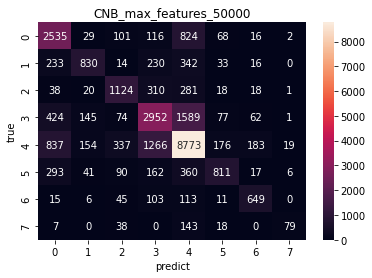

In [13]:
#混淆矩陣

cm = metrics.confusion_matrix(expected_kfold, predicted_kfold)
cm
#轉dataframe

df_cm = pd.DataFrame(cm)
df_cm

#annot = True 顯示數字 ，fmt參數不使用科學計數法進行顯示
ax = sns.heatmap(df_cm,annot=True,fmt='.20g')
ax.set_title('CNB_max_features_50000') #標題
ax.set_xlabel('predict') #x軸
ax.set_ylabel('true')

## MultinomialNB(尚未修改)

In [ ]:
features = train_o["cleaned_text"].values
labels = train_o['label'].values
features_pre = test["cleaned_text"].values

In [ ]:
model = MultinomialNB()

kf = KFold(n_splits = 10, shuffle = True)
tfidf_BOW = TfidfVectorizer(max_features = 16000)

expected_kfold = []
predicted_kfold = []

for idx, (train_index, test_index) in enumerate(kf.split(train_o)):
    x_train = [features[i] for i in train_index]
    y_train = labels[train_index]
    x_test = [features[i] for i in test_index]
    y_test = labels[test_index]
    
    # TF-IDF
    x_train_tfidf = tfidf_BOW.fit_transform(x_train)
    x_test_tfidf = tfidf_BOW.transform(x_test)
    model.fit(x_train_tfidf, y_train)

    # make predictions
    expected = y_test
    predicted = model.predict(x_test_tfidf)
    expected_kfold.extend(expected)
    predicted_kfold.extend(predicted)
    
    print(f"\n### {idx+1} ###\n")
    print(f'{metrics.classification_report(expected, predicted)}{"-"*60:>600}')

print(f'{"===Kfold Performance===":=^60}\n')
print(f'{metrics.classification_report(expected_kfold, predicted_kfold)}{"-"*60:>600}')
print(f"\nConfusion Matrix\n{metrics.confusion_matrix(expected_kfold, predicted_kfold)}")

In [ ]:
set(expected)-set(predicted)

In [ ]:
metrics.f1_score(expected, predicted, average='weighted', labels=np.unique(predicted))

In [ ]:
x_train = features
y_train = labels
x_TEST = features_pre

# TF-IDF
x_train_tfidf = tfidf_BOW.fit_transform(x_train)
x_TEST_tfidf = tfidf_BOW.transform(x_TEST)
model.fit(x_train_tfidf, y_train) 

# make predicitions
TEST_predict_result = model.predict(x_TEST_tfidf)

# transform label string to numbic due to Kaggle requirements.        
str_encode_num = {'informative':0, 'happy':1, 'angry':2, 'depressing':3, 'odd':4, 'boring':5, 'warm':6,'worried':7}

# output result to csv file
with open("./Logistic Regrssion 調整 max_df 0.9, min_df 0.1.csv", "w", encoding="utf-8") as f:
    f.write(f'Id,Label\n')
    for idx, item in enumerate([str_encode_num[item] for item in TEST_predict_result]):
        f.write(f'{idx},{item}\n')

## decision tree

In [10]:
model = DecisionTreeClassifier()

kf = KFold(n_splits = 10, shuffle = True)
tfidf_BOW = TfidfVectorizer(max_features = 16000) 
# tfidf_BOW = TfidfVectorizer(max_df = 0.6, min_df = 0.1)
# tfidf_BOW = TfidfVectorizer(max_features=10000)

expected_kfold = []
predicted_kfold = []

for idx, (train_index, test_index) in enumerate(kf.split(train_o)):
    x_train = [features[i] for i in train_index]
    y_train = labels[train_index]
    x_test = [features[i] for i in test_index]
    y_test = labels[test_index]
    
    # TF-IDF
    x_train_tfidf = tfidf_BOW.fit_transform(x_train)
    x_test_tfidf = tfidf_BOW.transform(x_test)
    model.fit(x_train_tfidf, y_train)
    
    # make predicitions
    expected = y_test
    predicted = model.predict(x_test_tfidf)
    expected_kfold.extend(expected)
    predicted_kfold.extend(predicted)
    
    print(f"\n### {idx+1} ###\n")
    print(f'{metrics.classification_report(expected, predicted)}{"-"*60:>600}')
    
print(f'{"===Kfold Performance===":=^60}\n')
print(f'{metrics.classification_report(expected_kfold, predicted_kfold)}{"-"*60:>600}')
print(f"\nConfusion Matrix\n{metrics.confusion_matrix(expected_kfold, predicted_kfold)}")


### 1 ###

              precision    recall  f1-score   support

       angry       0.50      0.47      0.49       381
      boring       0.54      0.60      0.57       157
  depressing       0.63      0.61      0.62       175
       happy       0.44      0.44      0.44       512
 informative       0.67      0.67      0.67      1204
         odd       0.58      0.65      0.61       174
        warm       0.65      0.67      0.66        96
     worried       0.67      0.62      0.64        29

    accuracy                           0.59      2728
   macro avg       0.59      0.59      0.59      2728
weighted avg       0.59      0.59      0.59      2728
                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
# pd.DataFrame(confusion_matrix(expected_kfold, predicted_kfold), columns = train.label, index = train.label)

In [13]:
x_train = features
y_train = labels
x_TEST = features_pre

# TF-IDF
x_train_tfidf = tfidf_BOW.fit_transform(x_train)
x_TEST_tfidf = tfidf_BOW.transform(x_TEST)
model.fit(x_train_tfidf, y_train) 

# make predicitions
TEST_predict_result = model.predict(x_TEST_tfidf)

# transform label string to numbic due to Kaggle requirements.        
str_encode_num = {'informative':0, 'happy':1, 'angry':2, 'depressing':3, 'odd':4, 'boring':5, 'warm':6,'worried':7}

# output result to csv file
# with open("./decision tree 調整max_features 16500.csv", "w", encoding="utf-8") as f:
#     f.write(f'Id,Label\n')
#     for idx, item in enumerate([str_encode_num[item] for item in TEST_predict_result]):
#         f.write(f'{idx},{item}\n')

In [17]:
print(type(expected_kfold))
print(type(predicted_kfold))

<class 'list'>
<class 'list'>


Text(33.0, 0.5, 'true')

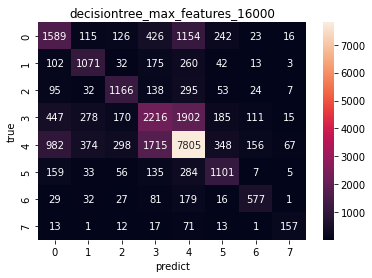

In [23]:
#混淆矩陣

cm = metrics.confusion_matrix(expected_kfold, predicted_kfold)
cm
#轉dataframe

df_cm = pd.DataFrame(cm)
df_cm

#annot = True 顯示數字 ，fmt參數不使用科學計數法進行顯示
ax = sns.heatmap(df_cm,annot=True,fmt='.20g')
ax.set_title('decisiontree_max_features_16000') #標題
ax.set_xlabel('predict') #x軸
ax.set_ylabel('true')

In [ ]:
# df_submission = pd.DataFrame({u'Id': test[u'index'], u'Label': model['y_encoder'].inverse_transform(TEST_predict_result)})

In [ ]:
# df_submission.to_csv('decision tree_k-fold10.csv', header=True, index=False)

## 畫決策樹(未修改)

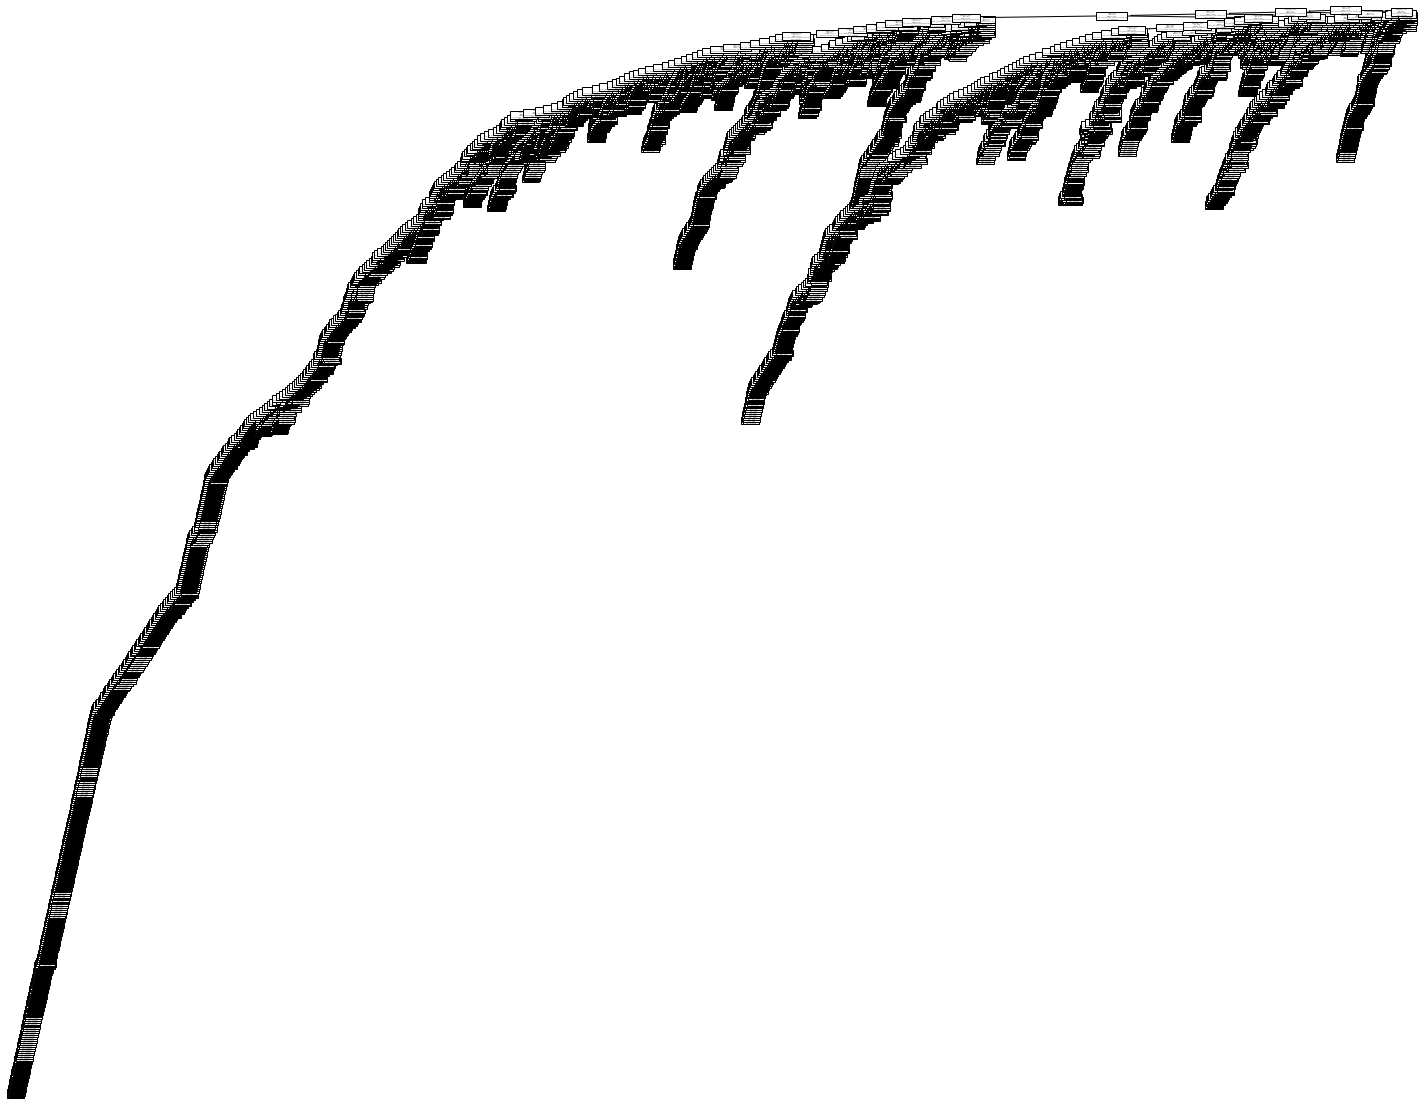

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names = train_o.label,
                   class_names = model.classes_)

fig.savefig("decistion_tree.png")

In [ ]:
dot_data = tree.export_graphviz(model, out_file = None,
                                feature_names = dataset.feature_names,
                                class_names = dataset.target_names,
                                filled = True)
graph = graphviz.Source(dot_data, format = "png")
graph

## 用cross_val_score評估資料分的份數是否適合

In [ ]:
scores = cross_val_score(DecisionTreeClassifier(), train.cleaned_text, train.label, cv = 10, 
                         scoring = 'f1_weighted')
print(scores)
print ('10 folds CV with weighted-F1: ', scores.mean())

In [ ]:
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

In [ ]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## 用 train_test_split 分訓練與測試的資料

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train['cleaned_text'], train['label'], test_size = 0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

## BERT